# **µ-LMS approximate to Gradient Descent**

Firstly, let's briefly review the gradient descent algorithm. Gradient descent is an iterative optimization algorithm that minimizes a given function by iteratively adjusting its parameters in the opposite direction of the gradient of the function with respect to those parameters. This process continues until the algorithm converges to a minimum point of the function.

Now, let's move on to µ-LMS. µ-LMS stands for Least Mean Squares. LMS is a commonly used algorithm in signal processing and machine learning for estimating unknown parameters in a linear system.

µ-LMS is an approximate version of the gradient descent algorithm that is particularly well-suited for systems with a small number of parameters. The main idea behind µ-LMS is to approximate the gradient of the function being optimized using a single data point. This is in contrast to the full-batch gradient descent, which uses all the data points to calculate the gradient.

Using only one data point to approximate the gradient has two benefits. First, it reduces the computational cost of the algorithm since we only need to compute the gradient with respect to a single data point instead of all data points. Second, it can lead to faster convergence, especially when the data is sparse.

The algorithm works by iteratively updating the parameters of the model using a single data point at each iteration. Let's take a closer look at the steps involved in the algorithm:

Initialize the parameters of the model to some initial values.

For each data point in the training set, perform the following steps:

a. Compute the output of the model for the given input using the current set of parameters.

b. Calculate the error between the predicted output and the actual output.

c. Update the parameters of the model using the following formula:

θ_i = θ_i - µ * error * x_i

where θ_i is the i-th parameter of the model, x_i is the i-th feature of the input data point, and µ is a learning rate parameter that determines the step size of the updates.

Repeat step 2 for a fixed number of iterations or until the algorithm converges to a minimum point.

One important thing to note is that µ-LMS uses a constant learning rate µ for all iterations. In contrast, the standard gradient descent algorithm often uses a decreasing learning rate that decreases over time as the algorithm approaches a minimum point.

The choice of the learning rate parameter µ is critical for the performance of the algorithm. If µ is too small, the algorithm may converge very slowly or not converge at all. If µ is too large, the algorithm may overshoot the minimum point and diverge.

In [21]:
import numpy as np

# Generate random input and output data
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 samples with 5 features each
y = np.random.rand(100, 1)  # 100 output values

# Define LMS with µ algorithm
def lms(mu, X, y, n_epochs):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, 1))  # Initialize weights to zero
    for epoch in range(n_epochs):
        for i in range(n_samples):
            x_i = X[i].reshape((n_features, 1))  # Convert input to column vector
            y_i = y[i]
            e_i = y_i - np.dot(x_i.T, W)  # Calculate error
            mu_i = mu / (1 + np.dot(x_i.T, x_i))  # Calculate step-size parameter
            W += mu_i * x_i * e_i  # Update weights
    return W

# Set hyperparameters and train model
mu = 0.01  # Step-size parameter
n_epochs = 1000  # Number of epochs
W = lms(mu, X, y, n_epochs)

# Print final weights
print("Final weights:")
print(W)


Final weights:
[[0.32270669]
 [0.09358546]
 [0.17472214]
 [0.21982124]
 [0.21800409]]


Final weights:
[[  2.90587522]
 [-17.79248004]
 [-15.50669929]
 [  7.2313753 ]
 [ -4.07863952]
 [  3.4327476 ]
 [ -5.50028453]]


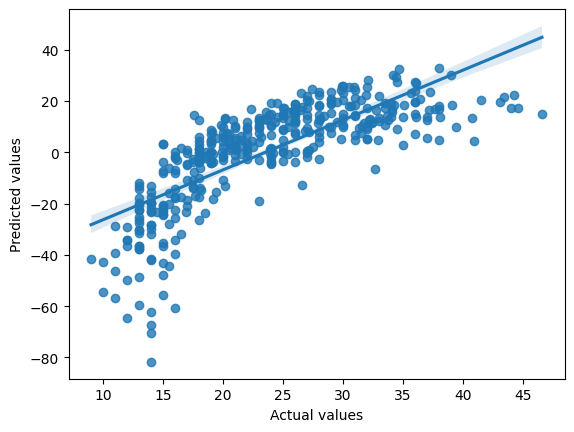

In [26]:
import pandas as pd
import numpy as np


# Load Boston Housing dataset
data = pd.read_csv('auto-mpg.csv')
X = data.drop('mpg', axis=1).values
y = data['mpg'].values.reshape(-1, 1)

# Normalize input data
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

# Define LMS with µ algorithm
def lms(mu, X, y, n_epochs):
    n_samples, n_features = X.shape
    W = np.zeros((n_features, 1))  # Initialize weights to zero
    for epoch in range(n_epochs):
        for i in range(n_samples):
            x_i = X[i].reshape((n_features, 1))  # Convert input to column vector
            y_i = y[i]
            e_i = y_i - np.dot(x_i.T, W)  # Calculate error
            mu_i = mu / (1 + np.dot(x_i.T, x_i))  # Calculate step-size parameter
            W += mu_i * x_i * e_i  # Update weights
    return W

# Set hyperparameters and train model
mu = 0.01  # Step-size parameter
n_epochs = 1000  # Number of epochs
W = lms(mu, X_norm, y, n_epochs)

# Print final weights
print("Final weights:")
print(W)

# Print regression plot of predicted vs. actual values

import matplotlib.pyplot as plt
import seaborn as sns

y_pred = np.dot(X_norm, W)
sns.regplot(x = y, y = y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()


In [23]:
# Apply Linear Regression on Auto MPG dataset

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_norm, y)

print(lr.coef_)
print(lr.intercept_)


[[-0.710559    1.96687316 -0.43435854 -5.68248814  0.28264069  2.7946801
   1.13549611]]
[23.51457286]
